In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('datasets/musical_instruments_reviews/Musical_instruments_reviews.csv')

In [3]:
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


In [5]:
data.describe()

,overall,unixReviewTime
count,10261.000000,1.026100e+04
mean,4.488744,1.360606e+09
std,0.894642,3.779735e+07
min,1.000000,1.095466e+09
25%,4.000000,1.343434e+09
50%,5.000000,1.368490e+09
75%,5.000000,1.388966e+09
max,5.000000,1.405987e+09


In [10]:
import spacy

In [12]:
spacy.load('en')

In [14]:
data.drop(['reviewerID','reviewerName','helpful'], axis=1, inplace=True)
data = data.rename(columns={'asin': 'product_id', 'overall': 'rating', 'unixReviewTime': 'unix_time'})

In [15]:
data.dropna(inplace=True, axis=0)

In [16]:
mvcols = (data.isnull().sum())
print(mvcols[mvcols > 0])

Series([], dtype: int64)


In [17]:
def sentiment(rating):
    if(rating <= 3):
        return 0
    else:
        return 1
def length(text):
    return len(text)

In [18]:
data['review'] = data['reviewText'] + ' ' + data['summary']

In [19]:
data['reviewTime'] = pd.to_datetime(data['reviewTime'])
data['year'] = data['reviewTime'].dt.year

In [20]:
data['sentiment'] = data['rating'].apply(sentiment)
data['reviewLength'] = data['review'].apply(length)

In [22]:
data.drop(['reviewText','summary','reviewTime'], inplace=True, axis=1)

In [23]:
data.head()

,product_id,rating,unix_time,review,year,sentiment,reviewLength
0,1384719342,5.0,1393545600,"Not much to write about here, but it does exac...",2014,1,273
1,1384719342,5.0,1363392000,The product does exactly as it should and is q...,2013,1,549
2,1384719342,5.0,1377648000,The primary job of this device is to block the...,2013,1,457
3,1384719342,5.0,1392336000,Nice windscreen protects my MXL mic and preven...,2014,1,236
4,1384719342,5.0,1392940800,This pop filter is great. It looks and perform...,2014,1,197


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

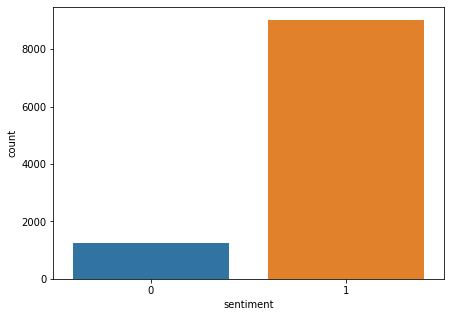

In [25]:
plt.figure(figsize=(7, 5))
sns.countplot(data['sentiment'])
plt.show()

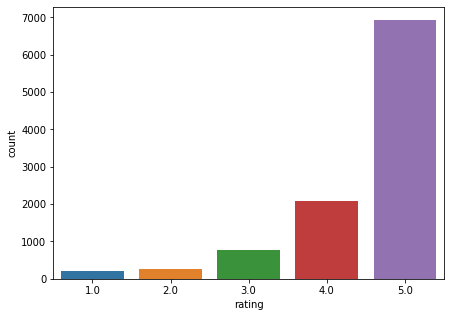

In [26]:
plt.figure(figsize=(7, 5))
sns.countplot(data['rating'])
plt.show()

In [28]:
nlp = spacy.load('en')

In [75]:
doc = nlp('this is a great show, the best show. So we are having a great time!')
words = ""
for token in doc:
    if token.is_stop == False and token.pos_ != 'PUNCT':
        print(token, token.lemma_, token.pos_)
        #words += token.lemma_

great great ADJ
best good ADJ
having have VERB
great great ADJ
time time NOUN


In [32]:
data.drop(['product_id', 'rating', 'unix_time', 'year', 'reviewLength'], inplace=True, axis=1)

In [76]:
def nlp_pipeline(text):
    processed_text = ''
    doc = nlp(text)
    for token in doc:
        if token.is_stop == False and token.pos_ != 'PUNCT':
            processed_text += token.lemma_ + ' '
    return processed_text

In [77]:
data['review_token'] = data['review'].apply(nlp_pipeline)

In [79]:
data.drop(['review'], inplace=True, axis=1)

In [80]:
data.head()

,sentiment,review_token
0,1,write exactly suppose filter pop sound recordi...
1,1,product exactly affordable realize double scre...
2,1,primary job device block breath produce poppin...
3,1,nice windscreen protect MXL mic prevent pop th...
4,1,pop filter great look perform like studio filt...


In [142]:
X = data['review_token']
y = data['sentiment']

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [91]:
tf = TfidfVectorizer(min_df=0, max_df=1, use_idf=True, ngram_range=(1, 2))
X = tf.fit_transform(X)

In [92]:
X.shape

(10254, 205089)

In [87]:
from sklearn.feature_extraction.text import CountVectorizer

In [88]:
cv = CountVectorizer(min_df=0, max_df=1, binary=False, ngram_range=(1, 3))
X = cv.fit_transform(X)

In [89]:
X.shape

(10254, 577377)

##### Let's try some data preparation that i found online

In [144]:
from sklearn.feature_extraction.text import TfidfTransformer

In [146]:
### count vectorizer then TF-IDF transformer:
cv = CountVectorizer(min_df=0, max_df=1, binary=False, ngram_range=(1, 3))
tf = TfidfTransformer()

In [148]:
X = cv.fit_transform(X)
X = tf.fit_transform(X)

##### Now carry on w transformations and modelling

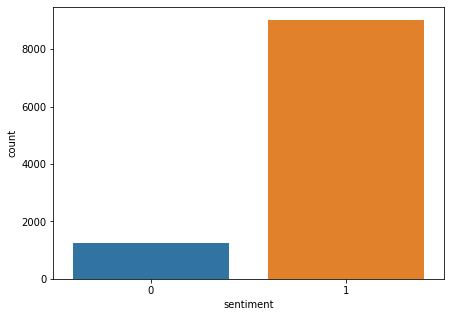

In [149]:
### before SMOTE
plt.figure(figsize=(7, 5))
sns.countplot(y)
plt.show()

In [94]:
from imblearn.combine import SMOTETomek

In [150]:
smk = SMOTETomek(random_state=0, sampling_strategy=0.8)
X, y = smk.fit_sample(X, y)

In [151]:
X.shape

(16227, 577377)

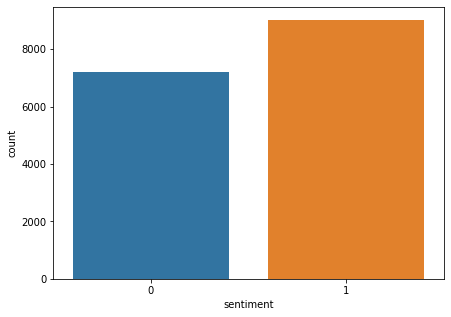

In [152]:
### after SMOTE
plt.figure(figsize=(7, 5))
sns.countplot(y)
plt.show()

In [99]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, f1_score

In [101]:
kFold = StratifiedKFold(random_state=0, n_splits=10, shuffle=True)

### Multinomial NB

In [100]:
from sklearn.naive_bayes import MultinomialNB

In [153]:
accs = []
f1s = []
for i, (train_idx, test_idx) in enumerate(kFold.split(X, y)):
    print('Fold:', i)
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    modelMNB = MultinomialNB()
    modelMNB.fit(X_train, y_train)
    preds = modelMNB.predict(X_test)
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    print('Acc:', acc, 'F1:', f1)
    accs.append(acc)
    f1s.append(f1)
    print()
print('Avg acc:', np.mean(accs))
print('Avg f1s:', np.mean(f1s))

# only tfidf:
# Avg acc: 0.7534351298724485
# Avg f1s: 0.7389316581661944

# cv + tfidf:
# Avg acc: 0.9851481819984456
# Avg f1s: 0.9868195407924661

Fold: 0
Acc: 0.9864448552064079 F1: 0.9879518072289156

Fold: 1
Acc: 0.9808995686999384 F1: 0.9831062670299727

Fold: 2
Acc: 0.982131854590265 F1: 0.9841789416257503

Fold: 3
Acc: 0.9852125693160814 F1: 0.9868708971553611

Fold: 4
Acc: 0.988909426987061 F1: 0.9901207464324918

Fold: 5
Acc: 0.9864448552064079 F1: 0.987938596491228

Fold: 6
Acc: 0.9864448552064079 F1: 0.987938596491228

Fold: 7
Acc: 0.9889025893958077 F1: 0.9901098901098901

Fold: 8
Acc: 0.9778051787916153 F1: 0.9804134929270946

Fold: 9
Acc: 0.9882860665844636 F1: 0.9895661724327293

Avg acc: 0.9851481819984456
Avg f1s: 0.9868195407924661


### SGD Classifier

In [109]:
from sklearn.linear_model import SGDClassifier

In [154]:
accs = []
f1s = []
for i, (train_idx, test_idx) in enumerate(kFold.split(X, y)):
    print('Fold:', i)
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    modelSGD = SGDClassifier(random_state=0)
    modelSGD.fit(X_train, y_train)
    preds = modelSGD.predict(X_test)
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    print('Acc:', acc, 'F1:', f1)
    accs.append(acc)
    f1s.append(f1)
    print()
print('Avg acc:', np.mean(accs))
print('Avg f1s:', np.mean(f1s))

# only tfidf:
# Avg acc: 0.8453185291885374
# Avg f1s: 0.8778512839064984

# cv + tfidf
# Avg acc: 0.8947434497775124
# Avg f1s: 0.9134867958027069

Fold: 0
Acc: 0.893407270486753 F1: 0.9124936772888214

Fold: 1
Acc: 0.8872458410351202 F1: 0.9079013588324106

Fold: 2
Acc: 0.8909426987060998 F1: 0.9106511862695609

Fold: 3
Acc: 0.9026494146642021 F1: 0.9194699286442405

Fold: 4
Acc: 0.8927911275415896 F1: 0.9120323559150658

Fold: 5
Acc: 0.8946395563770795 F1: 0.9133299543841865

Fold: 6
Acc: 0.8995686999383857 F1: 0.9170483460559796

Fold: 7
Acc: 0.905672009864365 F1: 0.9217391304347826

Fold: 8
Acc: 0.8902589395807645 F1: 0.9101010101010102

Fold: 9
Acc: 0.8902589395807645 F1: 0.9101010101010102

Avg acc: 0.8947434497775124
Avg f1s: 0.9134867958027069


### Log Regression

In [111]:
from sklearn.linear_model import LogisticRegression

In [155]:
accs = []
f1s = []
for i, (train_idx, test_idx) in enumerate(kFold.split(X, y)):
    print('Fold:', i)
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    modelLR = LogisticRegression(random_state=0)
    modelLR.fit(X_train, y_train)
    preds = modelLR.predict(X_test)
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    print('Acc:', acc, 'F1:', f1)
    accs.append(acc)
    f1s.append(f1)
    print()
print('Avg acc:', np.mean(accs))
print('Avg f1s:', np.mean(f1s))

# only tfidf:
# Avg acc: 0.8607864141620191
# Avg f1s: 0.8886990452698396

# cv + tfidf:
# Avg acc: 0.8485251695532698
# Avg f1s: 0.8800564927801748

Fold: 0
Acc: 0.8459642637091805 F1: 0.878286270691334

Fold: 1
Acc: 0.833641404805915 F1: 0.8698167791706847

Fold: 2
Acc: 0.8434996919285275 F1: 0.8765792031098153

Fold: 3
Acc: 0.8552064078866297 F1: 0.8847474252084355

Fold: 4
Acc: 0.8496611213801601 F1: 0.880859375

Fold: 5
Acc: 0.8465804066543438 F1: 0.878595806923452

Fold: 6
Acc: 0.8471965495995071 F1: 0.8790243902439023

Fold: 7
Acc: 0.8625154130702836 F1: 0.8898765432098766

Fold: 8
Acc: 0.8495684340320592 F1: 0.8807429130009775

Fold: 9
Acc: 0.8514180024660912 F1: 0.8820362212432697

Avg acc: 0.8485251695532698
Avg f1s: 0.8800564927801748


In [113]:
text = 'this is a great piece of equiment! I love it'
processed_text = nlp_pipeline(text)

In [115]:
x = tf.transform([processed_text])

In [116]:
modelLR.predict(x)

array([1])

In [123]:
data[data['sentiment'] == 0]

,sentiment,review_token
7,0,use cable run output pedal chain input Fender ...
12,0,use large sustaining pedal play piano appear l...
15,0,buy use keyboard aware option keyboard pedal w...
50,0,expect cable thin easily 1/2 thickness guitar ...
52,0,hum crackle think have problem equipment soo...
...,...,...
10189,0,fan Planet Waves NS capos new design way sit g...
10192,0,Planet Waves D'Addario Artist Capo like classi...
10237,0,wrong improvement old formulation noticeable l...
10247,0,look forward try love company product day thin...


In [ ]:
text = 'wrong improvement old formulation noticeable'
processed_text = nlp_pipeline(text)
x = tf.transform([processed_text])
print(modelMNB.predict(x))
print(modelSGD.predict(x))
print(modelLR.predict(x))

In [136]:
text = 'problem wrong creep ridiculous disconcert'
processed_text = nlp_pipeline(text)
x = tf.transform([processed_text])
print(modelMNB.predict(x))
print(modelSGD.predict(x))
print(modelLR.predict(x))

[1]
[1]
[1]


In [132]:
tf.get_feature_names()

['00 00',
 '00 20',
 '00 28',
 '00 30',
 '00 4000',
 '00 95',
 '00 absurdly',
 '00 amp',
 '00 asking',
 '00 bag',
 '00 buck',
 '00 bucket',
 '00 buy',
 '00 cable',
 '00 call',
 '00 choice',
 '00 clock',
 '00 compressor',
 '00 decent',
 '00 dozen',
 '00 easily',
 '00 eighty',
 '00 excellent',
 '00 for',
 '00 gain',
 '00 get',
 '00 gibson',
 '00 git',
 '00 give',
 '00 go',
 '00 guitar',
 '00 headphone',
 '00 high',
 '00 internet',
 '00 keeley',
 '00 lexicon',
 '00 light',
 '00 line',
 '00 lot',
 '00 low',
 '00 martin',
 '00 mid',
 '00 mixer',
 '00 neumann',
 '00 noise',
 '00 not',
 '00 overall',
 '00 overdrive',
 '00 packing',
 '00 parlor',
 '00 pickup',
 '00 plexi',
 '00 position',
 '00 practice',
 '00 put',
 '00 pyle',
 '00 real',
 '00 rule',
 '00 run',
 '00 s6',
 '00 see',
 '00 sight',
 '00 skeptical',
 '00 small',
 '00 sound',
 '00 spend',
 '00 start',
 '00 steal',
 '00 string',
 '00 switch',
 '00 thing',
 '00 this',
 '00 tone',
 '00 top',
 '00 treble',
 '00 understand',
 '00 unknown

In [158]:
text = 'problem wrong creep ridiculous disconcert'
processed_text = nlp_pipeline(text)
x = cv.transform([processed_text])
x = tf.transform(x)
print(modelMNB.predict(x))
print(modelSGD.predict(x))
print(modelLR.predict(x))

# :-(

[1]
[1]
[1]
